In [39]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import sklearn
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import datetime
from time import strptime

def cov_formula(IV_1, IV_2, IV_YCSO):
    result = (IV_1 ** 2 + IV_2 ** 2 - IV_YCSO ** 2) / 2
    return result


YCSO_6M = pd.read_csv('YCSO_6M.csv')
SWAP_6M = pd.read_csv('SWAP_6M.csv')
YCSO_6M = YCSO_6M.drop(YCSO_6M.index[991])
SWAP_6M = SWAP_6M.drop(SWAP_6M.index[991])

# Run for every day
length_YCSO = len(YCSO_6M)
length_SWAP_col = len(SWAP_6M.columns)

([<matplotlib.axis.XTick at 0x13a2a7790>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

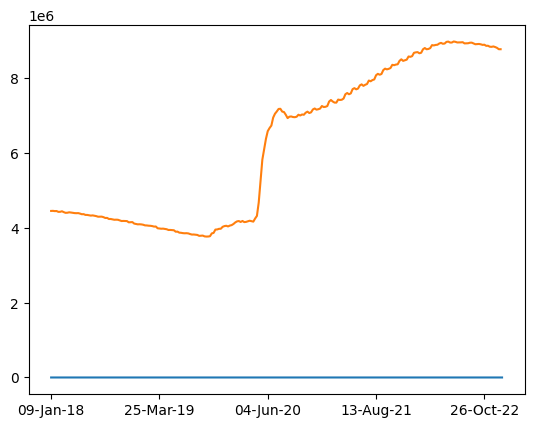

In [28]:
dates = []
beta = []
pervar = []

for n in range(length_YCSO):
        cov_mat = np.zeros((4,4))
        swap_iv = SWAP_6M.iloc[n]
        ycso_ic = YCSO_6M.iloc[n]
        dates.append(swap_iv[0])
        swap_iv = swap_iv.drop(swap_iv.index[0])
        ycso_iv = ycso_ic.drop(ycso_ic.index[0])
        
        for i in range(4):
            cov_mat[i][i]=swap_iv[i]**2
        
        cov_mat[0][1] = 0.5 * (swap_iv[0]**2 + swap_iv[1]**2 - ycso_iv[0]**2)
        cov_mat[1][0] = 0.5 * (swap_iv[0]**2 + swap_iv[1]**2 - ycso_iv[0]**2)
        cov_mat[0][2] = 0.5 * (swap_iv[0]**2 + swap_iv[2]**2 - ycso_iv[1]**2)
        cov_mat[2][0] = 0.5 * (swap_iv[0]**2 + swap_iv[2]**2 - ycso_iv[1]**2)
        cov_mat[0][3] = 0.5 * (swap_iv[0]**2 + swap_iv[3]**2 - ycso_iv[2]**2)
        cov_mat[3][0] = 0.5 * (swap_iv[0]**2 + swap_iv[3]**2 - ycso_iv[2]**2)
        
        cov_mat[1][2] = 0.5 * (swap_iv[1]**2 + swap_iv[2]**2 - ycso_iv[3]**2)
        cov_mat[2][1] = 0.5 * (swap_iv[1]**2 + swap_iv[2]**2 - ycso_iv[3]**2)
        cov_mat[1][3] = 0.5 * (swap_iv[1]**2 + swap_iv[3]**2 - ycso_iv[4]**2)
        cov_mat[3][1] = 0.5 * (swap_iv[1]**2 + swap_iv[3]**2 - ycso_iv[4]**2)
        
        cov_mat[2][3] = 0.5 * (swap_iv[2]**2 + swap_iv[3]**2 - ycso_iv[5]**2)
        cov_mat[3][2] = 0.5 * (swap_iv[2]**2 + swap_iv[3]**2 - ycso_iv[5]**2)
                
        D, P = np.linalg.eigh(cov_mat)
        PC1 = P[:,3]*np.sqrt(D[3])
        total_var = abs(D[0]) + D[1] + D[2] + D[3]
        beta.append(PC1[0]/PC1[2])
        pervar.append(D[3]/total_var)
        
        
pervar = np.array(pervar)
dates = np.array(dates)
plt.plot(dates,pervar)
plt.xticks(np.linspace(0,1200,5))

In [9]:
def iPCA(YCSOcsv, SWAPcsv, graph):
    YCSO = pd.read_csv(YCSOcsv)
    SWAP = pd.read_csv(SWAPcsv)
    YCSO = YCSO.dropna()
    SWAP = SWAP.dropna()
    length_YCSO = len(YCSO)
    length_SWAP_col = len(SWAP.columns)
    
    dates = []
    var = []
    
    for n in range(length_YCSO):
        cov_mat = np.zeros((4,4))
        swap_iv = SWAP.iloc[n]
        ycso_ic = YCSO.iloc[n]
        dates.append(swap_iv[0])
        swap_iv = swap_iv.drop(swap_iv.index[0])
        ycso_iv = ycso_ic.drop(ycso_ic.index[0])
        
        for i in range(4):
            cov_mat[i][i]=swap_iv[i]**2
        
        cov_mat[0][1] = 0.5 * (swap_iv[0]**2 + swap_iv[1]**2 - ycso_iv[0]**2)
        cov_mat[1][0] = 0.5 * (swap_iv[0]**2 + swap_iv[1]**2 - ycso_iv[0]**2)
        cov_mat[0][2] = 0.5 * (swap_iv[0]**2 + swap_iv[2]**2 - ycso_iv[1]**2)
        cov_mat[2][0] = 0.5 * (swap_iv[0]**2 + swap_iv[2]**2 - ycso_iv[1]**2)
        cov_mat[0][3] = 0.5 * (swap_iv[0]**2 + swap_iv[3]**2 - ycso_iv[2]**2)
        cov_mat[3][0] = 0.5 * (swap_iv[0]**2 + swap_iv[3]**2 - ycso_iv[2]**2)
        
        cov_mat[1][2] = 0.5 * (swap_iv[1]**2 + swap_iv[2]**2 - ycso_iv[3]**2)
        cov_mat[2][1] = 0.5 * (swap_iv[1]**2 + swap_iv[2]**2 - ycso_iv[3]**2)
        cov_mat[1][3] = 0.5 * (swap_iv[1]**2 + swap_iv[3]**2 - ycso_iv[4]**2)
        cov_mat[3][1] = 0.5 * (swap_iv[1]**2 + swap_iv[3]**2 - ycso_iv[4]**2)
        
        cov_mat[2][3] = 0.5 * (swap_iv[2]**2 + swap_iv[3]**2 - ycso_iv[5]**2)
        cov_mat[3][2] = 0.5 * (swap_iv[2]**2 + swap_iv[3]**2 - ycso_iv[5]**2)
        
        D, P = np.linalg.eigh(cov_mat)
        V = P * np.sqrt(abs(D))
        PC1 = P[:,3] * np.sqrt(D[3])
        PC2 = P[:,2] * np.sqrt(D[2])
        
        if graph == 'beta':
            var.append(PC1[0]/PC1[2])
        else:
            total_var = abs(D[0]) + D[1] + D[2] + D[3]
            var.append(D[1]/total_var)
            
    var = np.array(var)
    dates = np.array(dates)
    plt.plot(dates,var)
    plt.xticks(np.linspace(0,1200,5))

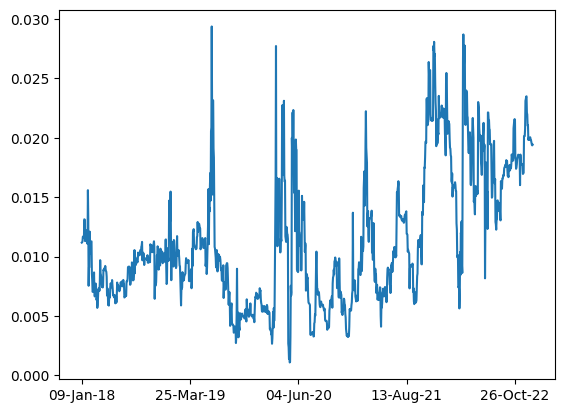

In [10]:
iPCA('YCSO_6M.csv','SWAP_6M.csv','pervar')

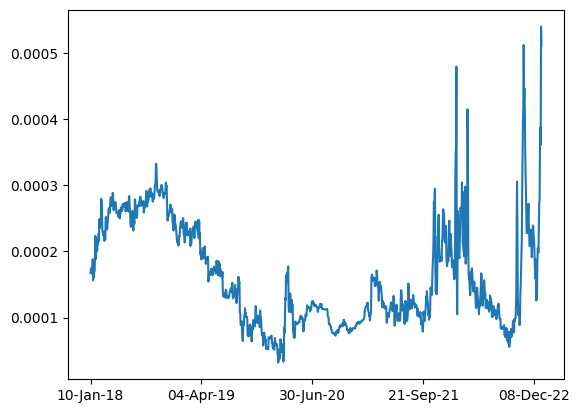

In [8]:
iPCA('EURO_YCSO.csv','EURO_SWAP.csv','pervar')

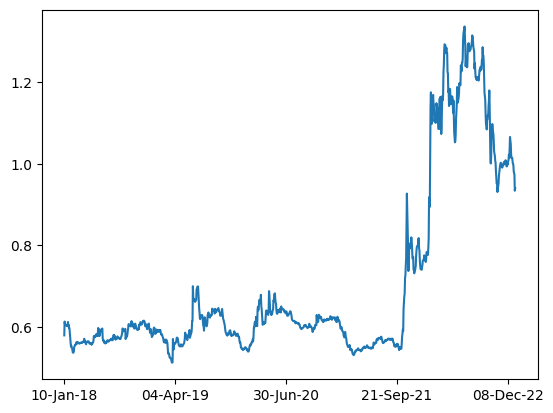

In [6]:
iPCA('EURO_YCSO.csv','EURO_SWAP.csv','beta')

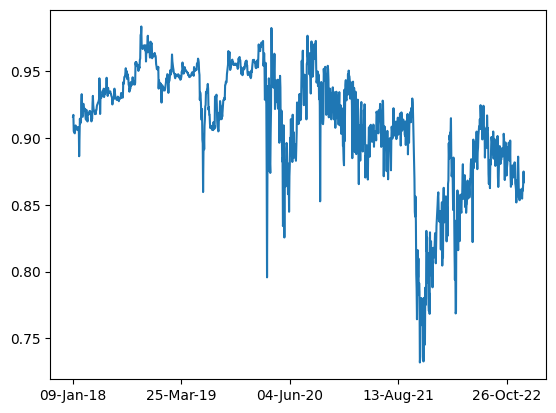

In [8]:
iPCA('SWAP_1M.csv','YCSO_1M.csv','pervar')

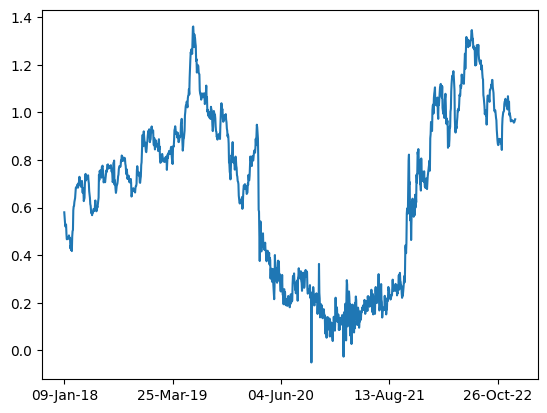

In [9]:
iPCA('SWAP_1M.csv','YCSO_1M.csv','beta')

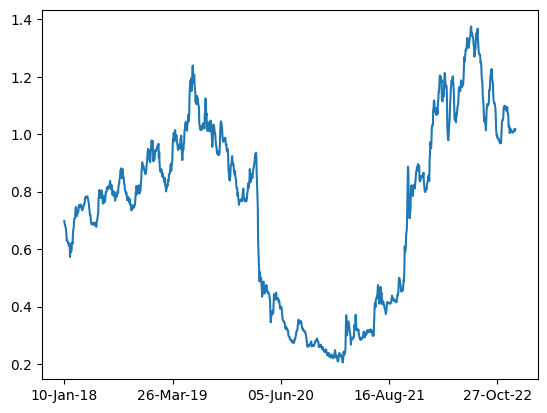

In [13]:
iPCA('SWAP_1Y.csv','YCSO_1Y.csv','beta')

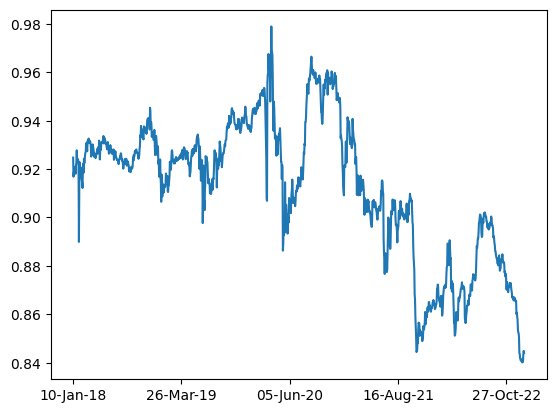

In [14]:
iPCA('SWAP_1Y.csv','YCSO_1Y.csv','pervar')

([<matplotlib.axis.XTick at 0x13453c850>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

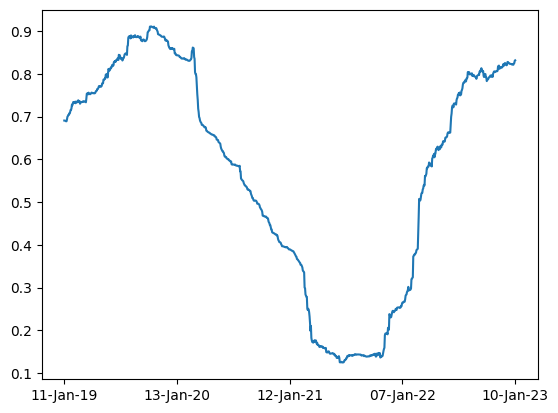

In [98]:
betas_data = pd.read_csv('Beta_Data.csv')
nums = betas_data.T.iloc[1:3].T
nums = nums.diff().fillna(0)
nums.iloc[0,:]=0
real_beta = []
dates = []
lag = 250

for n in range(len(nums)-lag):
    del_2 = nums[n:(n+lag)]
    del_2 = np.array(del_2.iloc[:,0]).astype(float)
    del_10 = nums[n:(n+lag)]
    del_10 = np.array(del_10.iloc[:,1]).astype(float)
    cov_210 = np.cov(del_2, del_10)[1][0]
    var_10 = np.cov(del_2, del_10)[1][1]
    
    real_beta.append(cov_210/var_10)
    dates.append(betas_data.iloc[(n+lag),0])
    
real_beta = np.array(real_beta)
dates = np.array(dates)
plt.plot(dates,real_beta)
plt.xticks(np.linspace(0,1000,5))

In [55]:
#iPCA pervar vol & fed data vol
#1 month lookback

1

In [80]:
fed_data = pd.read_csv('WALCL.csv')
temp = []
temp2 = []
df = pd.merge(SWAP_6M,YCSO_6M, on='Date')
for i in range(len(fed_data)):
    temp.append(datetime.date(int(fed_data.iloc[i,0][0:4]),int(fed_data.iloc[i,0][5:7]),int(fed_data.iloc[i,0][8:])))
for i in range(len(SWAP_6M)):
    temp2.append(datetime.date(2000+int(SWAP_6M.iloc[i,0][7:]),strptime(SWAP_6M.iloc[i,0][3:6],'%b').tm_mon,int(SWAP_6M.iloc[i,0][0:2])))

fed_data['Datetime'] = temp
df['Datetime'] = temp2
#print(fed_data.head())
fed_data = pd.merge(fed_data,df, on='Datetime')
fed_data.dropna()
print(fed_data.iloc[0])

DATE                                          2018-01-10
WALCL                                          4446062.0
Datetime                                      2018-01-10
Date                                           10-Jan-18
6 Month 2 Years Payer ATMF Implied BP Vol        2.83269
6 Month 5 Years Payer ATMF Implied BP Vol        3.42225
6 Month 10 Years Payer ATMF Implied BP Vol       3.67505
6 Month 30 Years Payer ATMF Implied BP Vol       3.68248
Datetime_x                                    2018-01-10
2yr x 5yr 6 Months Put ATMF BP Vol               1.21611
2yr x 10yr 6 Months Put ATMF BP Vol              2.04797
2yr x 30yr 6 Months Put ATMF BP Vol              2.47662
5yr x 10yr 6 Months Put ATMF BP Vol              1.08563
5yr x 30yr 6 Months Put ATMF BP Vol              1.95049
10yr x 30yr 6 Months Put ATMF BP Vol             0.90977
Datetime_y                                    2018-01-10
Name: 0, dtype: object


2019-06-19
2019-06-26
2019-07-03
2019-07-10
2019-07-17
2019-07-24
2019-07-31
2019-08-07
2019-10-09
2019-10-16
2020-03-11
2020-03-18
2020-03-25
2020-04-01
2020-04-08
2020-05-20
2020-05-27
2020-06-03
2020-06-10
2020-06-17
2020-06-24
2020-07-29
2020-08-05
2020-08-12
2020-08-19
2021-01-13
2021-01-20
2021-01-27
2021-02-03
2021-02-10
2021-02-17
2021-03-24
2021-03-31
2021-04-07
2021-06-30
2021-07-07
2021-07-14
2021-07-21
2021-07-28
2021-10-27
2021-11-03
2021-11-10
2021-11-17
2021-11-24
2021-12-01
2021-12-22
2021-12-29
2022-01-05
2022-03-23
2022-03-30
2022-04-06
2022-04-13
2022-04-20
2022-04-27
2022-08-03
2022-08-10


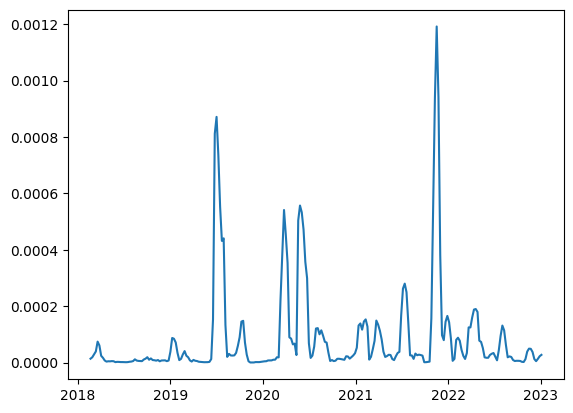

In [119]:
dates = []
pervar = []
fed = []

for n in range(len(fed_data)):
        cov_mat = np.zeros((4,4))
        temp = fed_data.iloc[n]
        swap_iv = temp[4:8]
        ycso_iv = temp[9:15]
        dates.append(fed_data.iloc[n,2])    
        fed.append(fed_data.iloc[n,1])
        
        for i in range(4):
            cov_mat[i][i]=swap_iv[i]**2
        
        cov_mat[0][1] = 0.5 * (swap_iv[0]**2 + swap_iv[1]**2 - ycso_iv[0]**2)
        cov_mat[1][0] = 0.5 * (swap_iv[0]**2 + swap_iv[1]**2 - ycso_iv[0]**2)
        cov_mat[0][2] = 0.5 * (swap_iv[0]**2 + swap_iv[2]**2 - ycso_iv[1]**2)
        cov_mat[2][0] = 0.5 * (swap_iv[0]**2 + swap_iv[2]**2 - ycso_iv[1]**2)
        cov_mat[0][3] = 0.5 * (swap_iv[0]**2 + swap_iv[3]**2 - ycso_iv[2]**2)
        cov_mat[3][0] = 0.5 * (swap_iv[0]**2 + swap_iv[3]**2 - ycso_iv[2]**2)
        
        cov_mat[1][2] = 0.5 * (swap_iv[1]**2 + swap_iv[2]**2 - ycso_iv[3]**2)
        cov_mat[2][1] = 0.5 * (swap_iv[1]**2 + swap_iv[2]**2 - ycso_iv[3]**2)
        cov_mat[1][3] = 0.5 * (swap_iv[1]**2 + swap_iv[3]**2 - ycso_iv[4]**2)
        cov_mat[3][1] = 0.5 * (swap_iv[1]**2 + swap_iv[3]**2 - ycso_iv[4]**2)
        
        cov_mat[2][3] = 0.5 * (swap_iv[2]**2 + swap_iv[3]**2 - ycso_iv[5]**2)
        cov_mat[3][2] = 0.5 * (swap_iv[2]**2 + swap_iv[3]**2 - ycso_iv[5]**2)
                
        D, P = np.linalg.eigh(cov_mat)
        total_var = abs(D[0]) + D[1] + D[2] + D[3]
        pervar.append(D[3]/total_var)
    
pervar2 = []
fedvar = []
lag = 6
for n in range(len(fed)-lag):
    fedvar.append(np.var(fed[n:(n+lag)]))
    pervar2.append(np.var(pervar[n:(n+lag)]))
    if np.var(pervar[n:(n+lag)]) > 0.0001:
        print(dates[n+lag])

pervar2 = np.array(pervar2)
dates = np.array(dates[lag:])
fedvar = np.array(fedvar)
fed = np.array(fed)
pervar = np.array(pervar)
plt.plot(dates,pervar2)

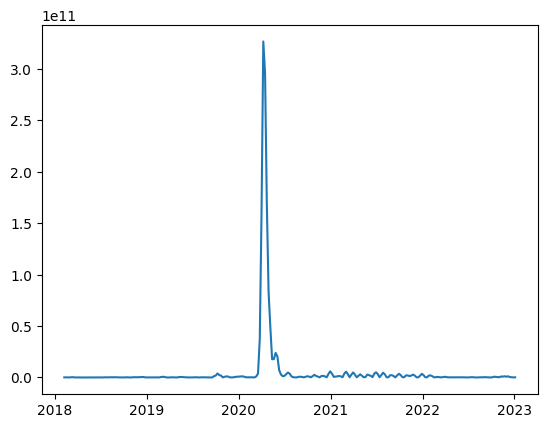

In [106]:
plt.plot(dates,fedvar)